In [1]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [4]:
# Define Solar Plant Data File
sunlab_faro = pd.read_csv('Sunlab_Faro_Cleaned.csv')

In [5]:
# Ensure Datetime is in datetime format
sunlab_faro['Datetime'] = pd.to_datetime(sunlab_faro['Datetime'])

# Sort the data by datetime for readability
sunlab_faro = sunlab_faro.sort_values(by='Datetime')

In [6]:
sunlab_faro.head()

,Datetime,A_Vertical - Voltage DC [V],A_Vertical - Current DC [A],A_Vertical - Power DC [W],A_Optimal - Voltage DC [V],A_Optimal - Current DC [A],A_Optimal - Power DC [W],A_Horizontal - Voltage DC [V],A_Horizontal - Current DC [A],A_Horizontal - Power DC [W],...,Solar_Month,Ambient Temperature [ÂºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [Âº],Precipitation [mm],Atmospheric pressure [hPa],Meteo_Month
0,2017-01-20 07:52:00+00:00,19.25,0.0750,1.44375,21.60,0.1075,2.322000,18.80,0.0650,1.222,...,1,4.900000,7.267174,6.914082,1.353073,3.600000,331.65972,0.0,1013.7668,1
1,2017-01-20 07:53:00+00:00,19.25,0.0850,1.63625,32.15,0.0450,1.446750,18.80,0.0725,1.363,...,1,4.983333,8.119104,7.055244,1.416638,3.900000,330.66696,0.0,1013.7668,1
2,2017-01-20 07:54:00+00:00,19.20,0.1175,2.25600,32.75,0.0450,1.473750,18.75,0.0800,1.500,...,1,5.000000,8.641460,8.173192,1.483865,3.550000,330.99438,0.0,1013.7834,1
3,2017-01-20 07:55:00+00:00,19.30,0.2775,5.35575,32.95,0.1650,5.436750,18.75,0.1000,1.875,...,1,5.000000,9.611446,8.830058,1.548960,3.500000,330.83166,0.0,1013.8000,1
4,2017-01-20 07:56:00+00:00,19.20,0.4900,9.40800,30.15,0.4375,13.190625,18.85,0.1200,2.262,...,1,5.000000,12.314148,10.599564,1.618800,4.316667,332.66656,0.0,1013.7834,1


In [7]:
sunlab_faro.tail()

,Datetime,A_Vertical - Voltage DC [V],A_Vertical - Current DC [A],A_Vertical - Power DC [W],A_Optimal - Voltage DC [V],A_Optimal - Current DC [A],A_Optimal - Power DC [W],A_Horizontal - Voltage DC [V],A_Horizontal - Current DC [A],A_Horizontal - Power DC [W],...,Solar_Month,Ambient Temperature [ÂºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [Âº],Precipitation [mm],Atmospheric pressure [hPa],Meteo_Month
200686,2017-12-31 16:57:00+00:00,26.70,0.0300,0.80100,29.45,0.0325,0.957125,19.05,0.0925,1.762125,...,12,16.800002,14.352264,13.914030,1.323520,5.100000,298.50012,0.0,1026.4166,12
200687,2017-12-31 16:58:00+00:00,26.35,0.0300,0.79050,29.30,0.0350,1.025500,19.05,0.0900,1.714500,...,12,16.800002,13.566784,13.608252,1.285211,3.850001,276.45834,0.0,1026.4500,12
200688,2017-12-31 16:59:00+00:00,25.80,0.0275,0.70950,17.75,0.0850,1.508750,19.05,0.0850,1.619250,...,12,16.800002,13.325932,13.177236,1.243477,4.450000,276.37098,0.0,1026.4834,12
200689,2017-12-31 17:00:00+00:00,24.70,0.0275,0.67925,28.60,0.0350,1.001000,18.95,0.0750,1.421250,...,12,16.800002,12.727142,12.790736,1.215823,4.966667,295.83680,0.0,1026.5000,12
200690,2017-12-31 17:01:00+00:00,21.40,0.0325,0.69550,28.10,0.0350,0.983500,28.55,0.0250,0.713750,...,12,16.800002,11.669994,11.455128,1.205234,4.416667,295.66842,0.0,1026.5000,12


In [8]:
sunlab_faro.describe(include='all')

,Datetime,A_Vertical - Voltage DC [V],A_Vertical - Current DC [A],A_Vertical - Power DC [W],A_Optimal - Voltage DC [V],A_Optimal - Current DC [A],A_Optimal - Power DC [W],A_Horizontal - Voltage DC [V],A_Horizontal - Current DC [A],A_Horizontal - Power DC [W],...,Solar_Month,Ambient Temperature [ÂºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [Âº],Precipitation [mm],Atmospheric pressure [hPa],Meteo_Month
count,200691,200691.000000,200691.000000,200691.000000,200691.000000,200691.000000,200691.000000,200691.000000,200691.000000,200691.000000,...,200691.000000,2.006910e+05,200691.000000,200691.000000,200691.000000,2.006910e+05,200691.000000,200691.000000,2.006910e+05,200691.000000
mean,2017-06-19 13:23:06.762336256+00:00,26.252711,2.170268,61.195466,27.672007,3.609247,101.808639,26.763465,3.339548,92.314335,...,6.100732,-7.452739e+03,466.277091,130.105883,28.000593,-7.471522e+03,190.674038,0.000854,-6.458668e+03,6.100732
min,2017-01-20 07:52:00+00:00,10.950000,0.000000,0.000000,14.100000,0.000000,0.000000,10.350000,0.000000,0.000000,...,1.000000,-1.500000e+09,0.742100,1.626869,0.501335,-1.500000e+09,0.000000,0.000000,-1.499999e+09,1.000000
25%,2017-04-06 11:01:30+00:00,26.600000,0.710000,15.938250,27.350000,1.155000,32.865437,26.900000,1.157500,30.126938,...,4.000000,1.700000e+01,176.418180,61.527104,10.656561,1.750000e+00,116.835870,0.000000,1.012217e+03,4.000000
50%,2017-06-07 18:21:00+00:00,28.000000,1.777500,49.362500,28.100000,3.570000,102.711000,27.700000,3.125000,89.848500,...,6.000000,2.150000e+01,450.278240,99.891704,25.853592,2.566667e+00,201.998480,0.000000,1.014833e+03,6.000000
75%,2017-08-16 06:59:30+00:00,29.250000,3.252500,94.449375,29.000000,5.977500,169.261250,28.850000,5.282500,146.701500,...,8.000000,2.598333e+01,732.958640,174.707150,43.844202,3.416667e+00,261.038170,0.000000,1.018517e+03,8.000000
max,2017-12-31 17:01:00+00:00,34.700000,7.985000,244.295250,35.200000,10.237500,301.106000,35.050000,10.237500,302.693500,...,12.000000,3.790000e+01,1484.379800,715.146720,85.515376,1.030000e+01,359.999200,2.030000,1.035900e+03,12.000000
std,NaN,4.549251,1.734715,51.613642,2.569127,2.493775,70.009946,3.818305,2.351136,64.710356,...,3.033477,3.348323e+06,321.235595,104.449213,19.605319,3.348323e+06,85.926610,0.017064,3.348323e+06,3.033477


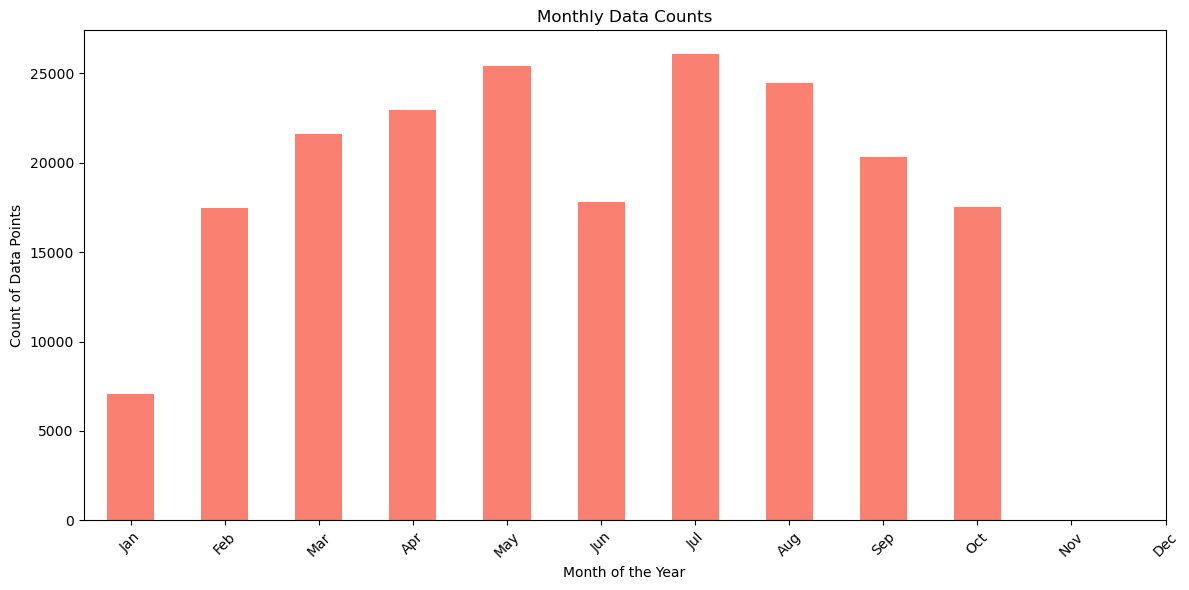

In [9]:
# group data by month for plotting
monthly_data_count = sunlab_faro.groupby('Solar_Month').size()

# Plot bar chart
plt.figure(figsize=(12,6))
monthly_data_count.plot(kind='bar', color='salmon')
plt.title('Monthly Data Counts')
plt.xlabel('Month of the Year')
plt.ylabel('Count of Data Points')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# Define Solar Plant Data File
sunlab_faro = pd.read_csv('Sunlab_Faro_Cleaned_mjs.csv')

In [11]:
# Ensure Datetime is in datetime format
sunlab_faro['Datetime'] = pd.to_datetime(sunlab_faro['Datetime'])

# Sort the data by datetime for readability
sunlab_faro = sunlab_faro.sort_values(by='Datetime')

In [12]:
sunlab_faro.head()

,Datetime,A_Optimal - Voltage DC [V],A_Optimal - Current DC [A],A_Optimal - Power DC [W],A_Optimal - Temperature [C],B_Optimal - Voltage DC [V],B_Optimal - Current DC [A],B_Optimal - Power DC [W],B_Optimal - Temperature [C],Ambient Temperature [C],Global Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [Deg],Precipitation [mm]
0,2014-01-01 07:41:00,14.6,0.19527,2.850946,9.4,0.00,0.000000,0.000000,9.7,9.7,7.131149,0.751824,0.700000,275.33384,0.0
1,2014-01-01 07:42:00,23.1,0.07250,1.674750,9.4,18.30,0.130512,2.388366,9.7,9.7,7.040442,0.781930,0.666667,278.50306,0.0
2,2014-01-01 07:43:00,23.1,0.07500,1.732500,9.4,22.35,0.052500,1.173375,9.7,9.7,6.594407,0.813929,0.616667,284.66712,0.0
3,2014-01-01 07:44:00,23.1,0.07750,1.790250,9.5,24.35,0.052500,1.278375,9.7,9.7,7.358729,0.849919,0.666667,278.66666,0.0
4,2014-01-01 07:45:00,22.2,0.08250,1.831500,9.5,25.25,0.052500,1.325625,9.7,9.7,7.470711,0.886891,0.633333,272.66636,0.0


In [13]:
sunlab_faro.tail()

,Datetime,A_Optimal - Voltage DC [V],A_Optimal - Current DC [A],A_Optimal - Power DC [W],A_Optimal - Temperature [C],B_Optimal - Voltage DC [V],B_Optimal - Current DC [A],B_Optimal - Power DC [W],B_Optimal - Temperature [C],Ambient Temperature [C],Global Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [Deg],Precipitation [mm]
833673,2017-12-31 17:14:00,0.0,0.0,0.0,17.6,0.0,0.0,0.0,18.2,16.600000,4.253332,0.836134,5.283334,298.33362,0.0
833674,2017-12-31 17:15:00,0.0,0.0,0.0,17.6,0.0,0.0,0.0,18.2,16.600000,4.628277,0.824518,4.583334,293.33710,0.0
833675,2017-12-31 17:16:00,0.0,0.0,0.0,17.5,0.0,0.0,0.0,18.1,16.600000,7.650642,0.810895,3.533333,286.99006,0.0
833676,2017-12-31 17:17:00,0.0,0.0,0.0,17.4,0.0,0.0,0.0,18.1,16.600000,8.252296,0.779220,3.016667,291.67706,0.0
833677,2017-12-31 17:18:00,0.0,0.0,0.0,17.4,0.0,0.0,0.0,18.0,16.550002,6.739828,0.752964,5.100000,295.66644,0.0


In [14]:
sunlab_faro.describe(include='all')

,Datetime,A_Optimal - Voltage DC [V],A_Optimal - Current DC [A],A_Optimal - Power DC [W],A_Optimal - Temperature [C],B_Optimal - Voltage DC [V],B_Optimal - Current DC [A],B_Optimal - Power DC [W],B_Optimal - Temperature [C],Ambient Temperature [C],Global Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [Deg],Precipitation [mm]
count,833678,833678.000000,833678.000000,833678.000000,833678.000000,833678.000000,833678.000000,833678.000000,833678.000000,8.336780e+05,833678.000000,833678.000000,8.336780e+05,833678.000000,833678.000000
mean,2015-10-26 18:04:17.327049728,27.118184,3.504649,98.448497,28.468207,25.951535,3.553634,97.045584,30.343410,-5.376799e+03,449.180629,27.217776,-5.395166e+03,197.837774,0.000291
min,2014-01-01 07:41:00,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.300000,-1.500000e+09,0.732156,0.500453,-1.500000e+09,0.000000,0.000000
25%,2014-10-05 08:13:15,27.050000,0.977500,27.208500,21.300000,26.700000,0.962500,23.528000,22.300000,1.660000e+01,153.678990,9.670922,1.650000e+00,122.493330,0.000000
50%,2015-07-27 08:09:30,27.900000,3.312500,95.159188,28.600000,27.350000,3.265000,92.109875,30.500000,2.100000e+01,422.699340,24.338738,2.516667e+00,217.503060,0.000000
75%,2016-12-27 12:32:45,28.950000,5.900000,166.168750,35.600000,28.000000,6.147500,167.909625,38.300000,2.523334e+01,720.995820,43.190892,3.416667e+00,267.246715,0.000000
max,2017-12-31 17:18:00,36.900000,10.237500,307.636875,58.600000,36.550000,10.237500,310.708125,62.000000,3.830000e+01,1484.379800,85.515376,1.228333e+01,359.999200,2.040000
std,NaN,4.187117,2.575776,71.903439,8.939499,4.748999,2.653285,72.668901,9.829492,2.845458e+06,319.896252,19.578594,2.845458e+06,86.841576,0.010850


In [15]:
sunlab_faro.dtypes

Datetime                       datetime64[ns]
A_Optimal - Voltage DC [V]            float64
A_Optimal - Current DC [A]            float64
A_Optimal - Power DC [W]              float64
A_Optimal - Temperature [C]           float64
B_Optimal - Voltage DC [V]            float64
B_Optimal - Current DC [A]            float64
B_Optimal - Power DC [W]              float64
B_Optimal - Temperature [C]           float64
Ambient Temperature [C]               float64
Global Radiation [W/m2]               float64
Ultraviolet [W/m2]                    float64
Wind Velocity [m/s]                   float64
Wind Direction [Deg]                  float64
Precipitation [mm]                    float64
dtype: object

In [16]:
# extract month for plotting
sunlab_faro['Month'] = sunlab_faro['Datetime'].dt.month

# group data by month for plotting
monthly_data = sunlab_faro.groupby('Month').size()

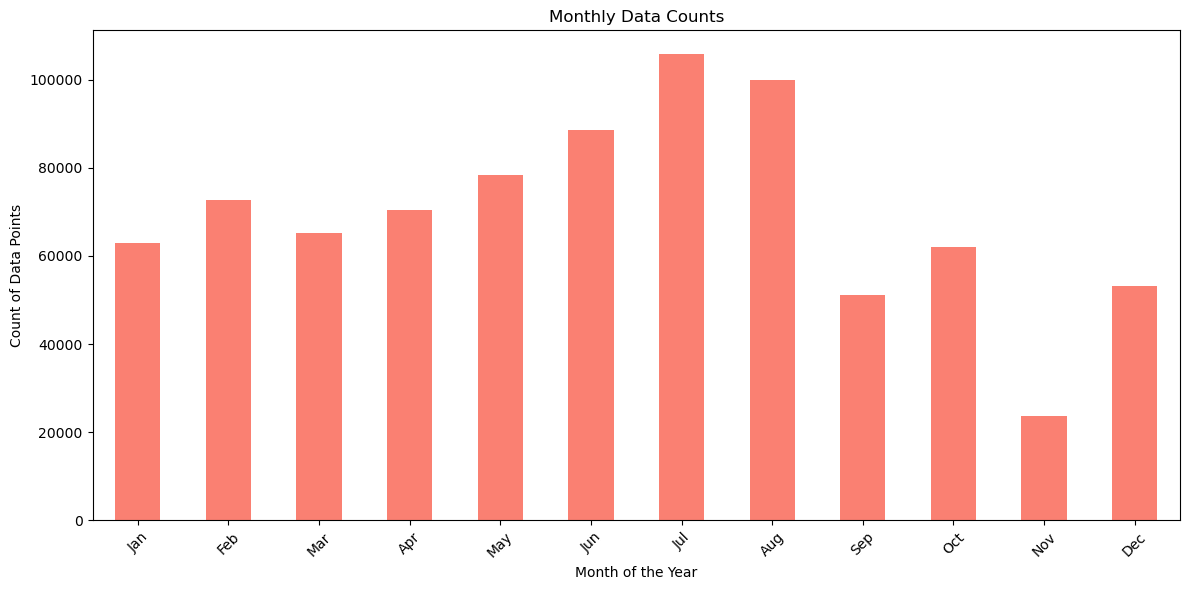

In [19]:
# Plot bar chart
plt.figure(figsize=(12,6))
monthly_data.plot(kind='bar', color='salmon')
plt.title('Monthly Data Counts')
plt.xlabel('Month of the Year')
plt.ylabel('Count of Data Points')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()
plt.show()

In [22]:
# extract year for plotting
sunlab_faro['Year'] = sunlab_faro['Datetime'].dt.year

# group data by month for plotting
yearly_data = sunlab_faro.groupby('Year').size()

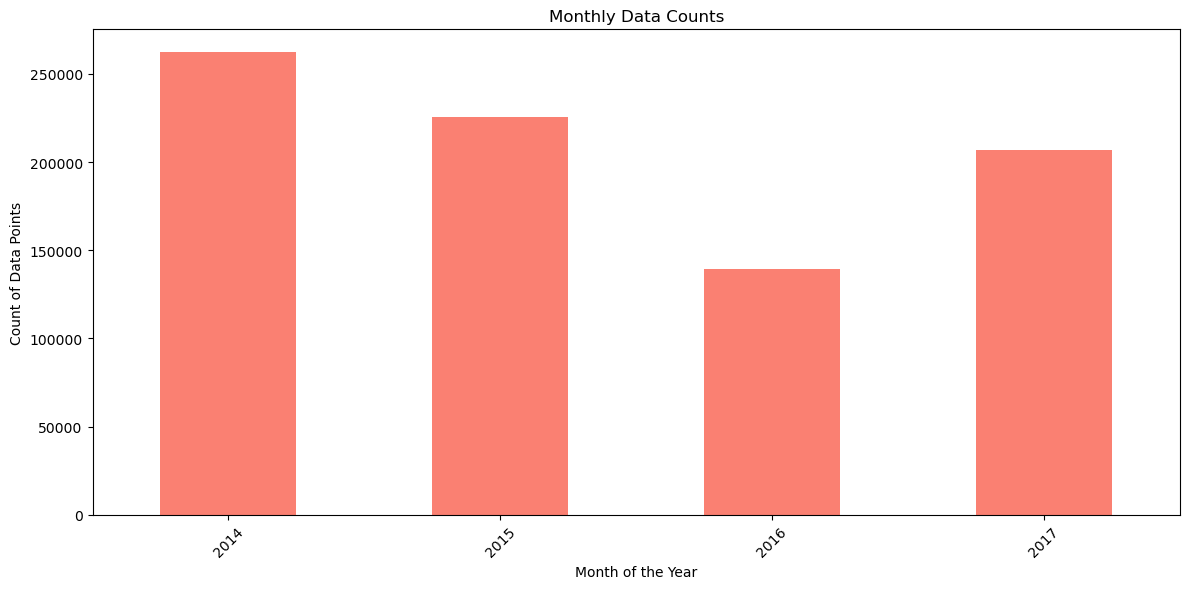

In [24]:
# Plot bar chart
plt.figure(figsize=(12,6))
yearly_data.plot(kind='bar', color='salmon')
plt.title('Monthly Data Counts')
plt.xlabel('Month of the Year')
plt.ylabel('Count of Data Points')
plt.xticks(ticks=range(4), labels=['2014', '2015', '2016', '2017'], rotation=45)
plt.tight_layout()
plt.show()

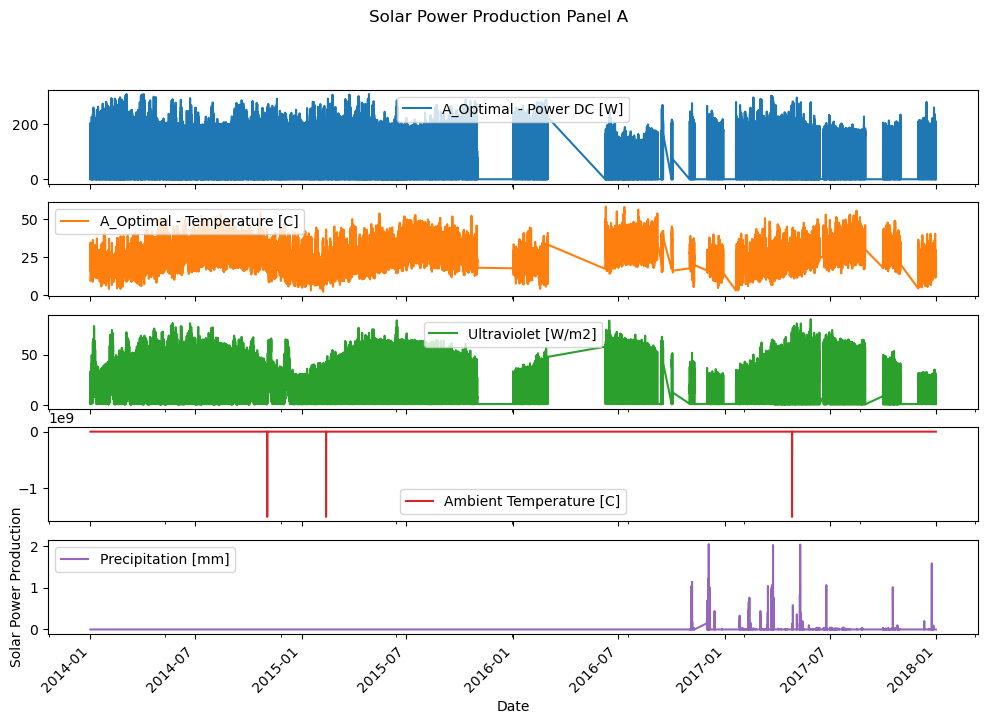

In [36]:
# plot 5 comparison charts for Panel A
# define five columns
five_columns_a = ['A_Optimal - Power DC [W]', 'A_Optimal - Temperature [C]', 'Ultraviolet [W/m2]', 'Ambient Temperature [C]', 'Precipitation [mm]']

# plot the four columns as is with no changes
sunlab_faro.plot(x='Datetime', y=five_columns_a, subplots=True, figsize=(12,8), sharex=True, title="Solar Power Production Panel A")
plt.ylabel("Solar Power Production")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.show()

In [31]:
# let's group data by month and compare monthly mean data
data_index = sunlab_faro.set_index('Datetime', inplace=False)

# only select numeric columns to calculate mean
numeric_data = data_index.select_dtypes(include='number')

# use the pd.Grouper function to group by month and calculate the mean for that month
monthly_data = numeric_data.groupby(pd.Grouper(freq='ME')).mean()

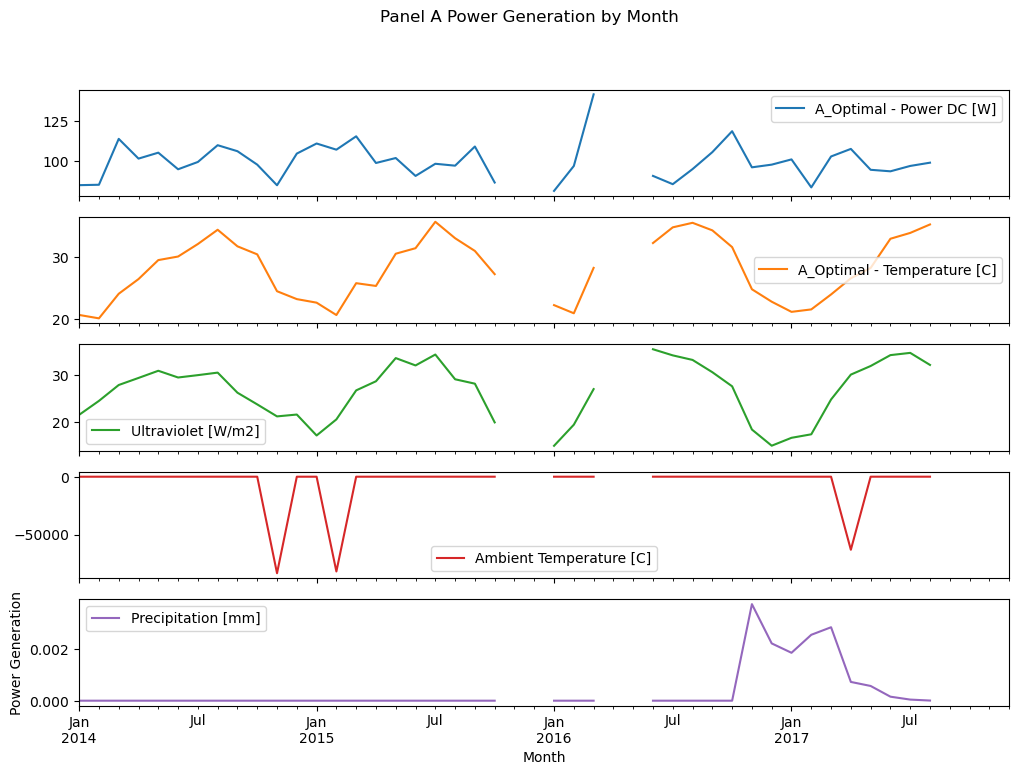

In [32]:
# plot 5 comparison charts for Panel A
# define five columns
five_columns_a = ['A_Optimal - Power DC [W]', 'A_Optimal - Temperature [C]', 'Ultraviolet [W/m2]', 'Ambient Temperature [C]', 'Precipitation [mm]']

#plot monthly data
monthly_data[five_columns_a].plot(subplots=True, figsize=(12,8), sharex=True, title="Panel A Power Generation by Month")
plt.xlabel("Month")
plt.ylabel("Power Generation")
plt.show()

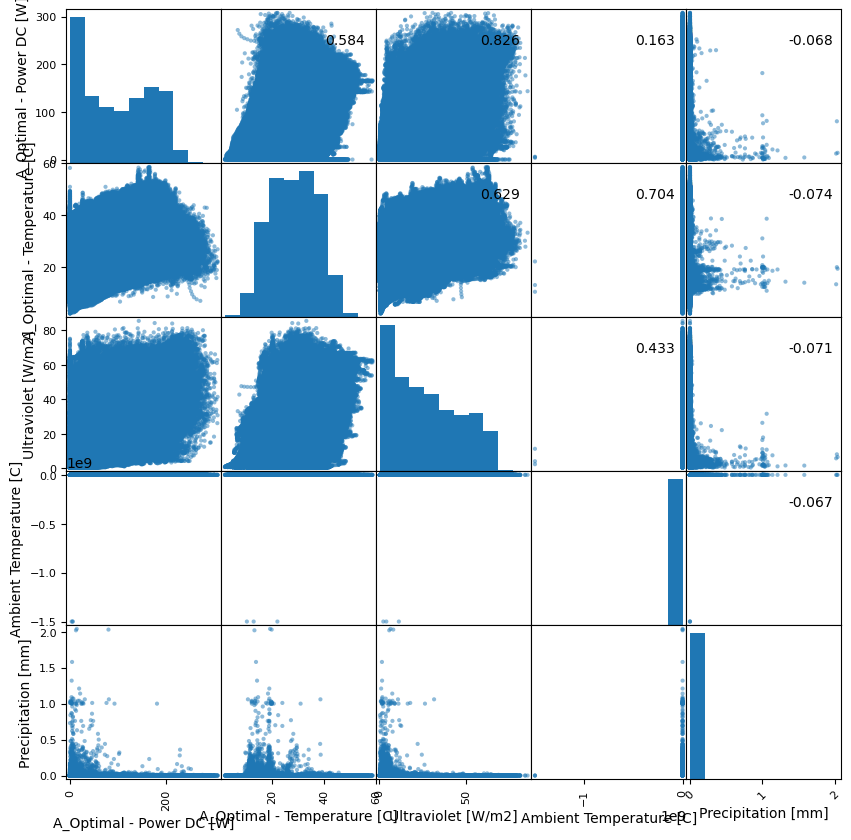

In [34]:
# correlation matrix
axes = pd.plotting.scatter_matrix(sunlab_faro[['A_Optimal - Power DC [W]', 'A_Optimal - Temperature [C]', 'Ultraviolet [W/m2]', 
                                               'Ambient Temperature [C]', 'Precipitation [mm]']], alpha=0.5,figsize = [10,10])
corr = sunlab_faro[['A_Optimal - Power DC [W]', 'A_Optimal - Temperature [C]', 'Ultraviolet [W/m2]', 
                                               'Ambient Temperature [C]', 'Precipitation [mm]']].corr(method = 'spearman').to_numpy() #nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

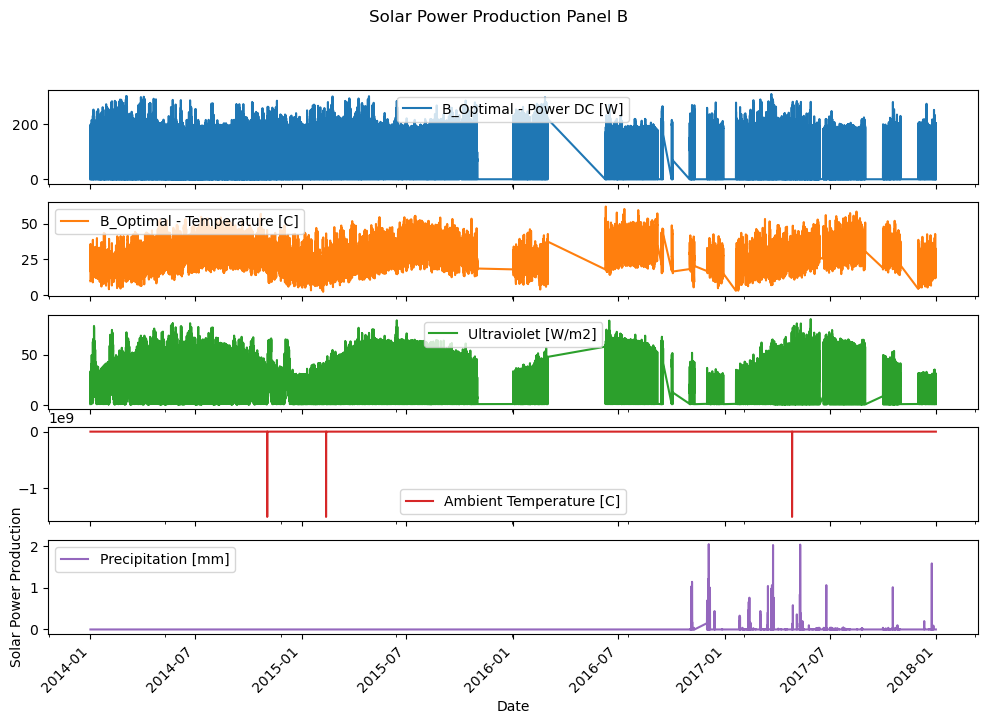

In [35]:
# plot 5 comparison charts for Panel B
# define five columns
five_columns_b = ['B_Optimal - Power DC [W]', 'B_Optimal - Temperature [C]', 'Ultraviolet [W/m2]', 'Ambient Temperature [C]', 'Precipitation [mm]']

# plot the four columns as is with no changes
sunlab_faro.plot(x='Datetime', y=five_columns_b, subplots=True, figsize=(12,8), sharex=True, title="Solar Power Production Panel B")
plt.ylabel("Solar Power Production")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.show()

In [37]:
# let's group data by month and compare monthly mean data
data_index = sunlab_faro.set_index('Datetime', inplace=False)

# only select numeric columns to calculate mean
numeric_data = data_index.select_dtypes(include='number')

# use the pd.Grouper function to group by month and calculate the mean for that month
monthly_data = numeric_data.groupby(pd.Grouper(freq='ME')).mean()

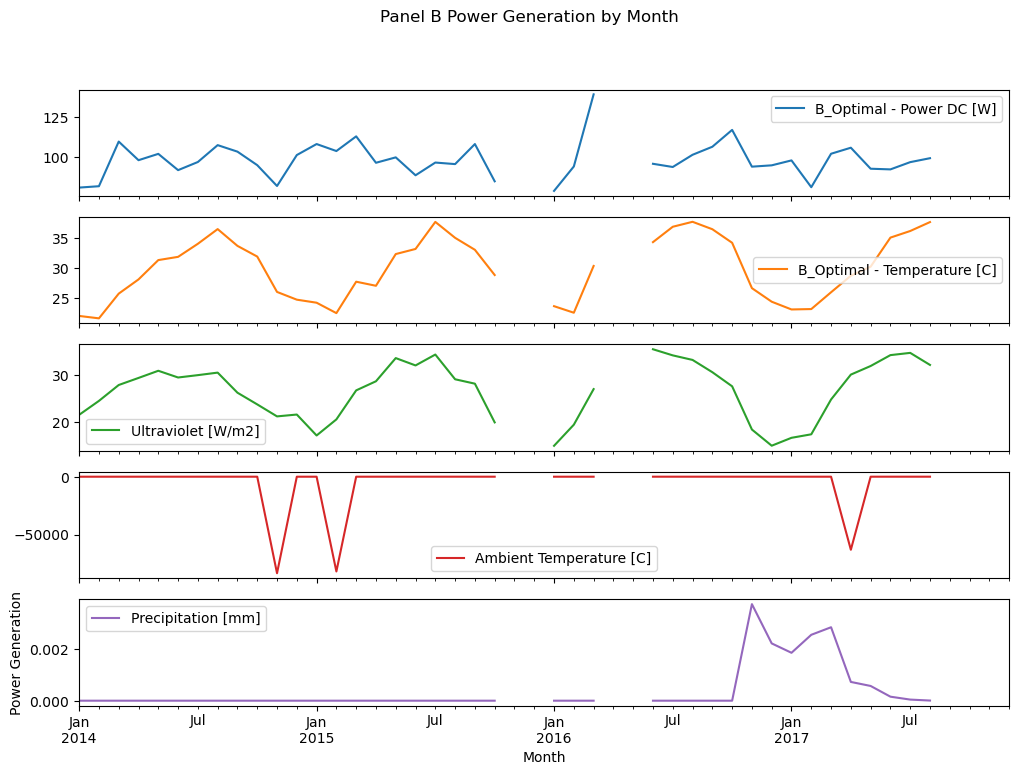

In [38]:
# plot 5 comparison charts for Panel B
# define five columns
five_columns_b = ['B_Optimal - Power DC [W]', 'B_Optimal - Temperature [C]', 'Ultraviolet [W/m2]', 'Ambient Temperature [C]', 'Precipitation [mm]']

#plot monthly data
monthly_data[five_columns_b].plot(subplots=True, figsize=(12,8), sharex=True, title="Panel B Power Generation by Month")
plt.xlabel("Month")
plt.ylabel("Power Generation")
plt.show()

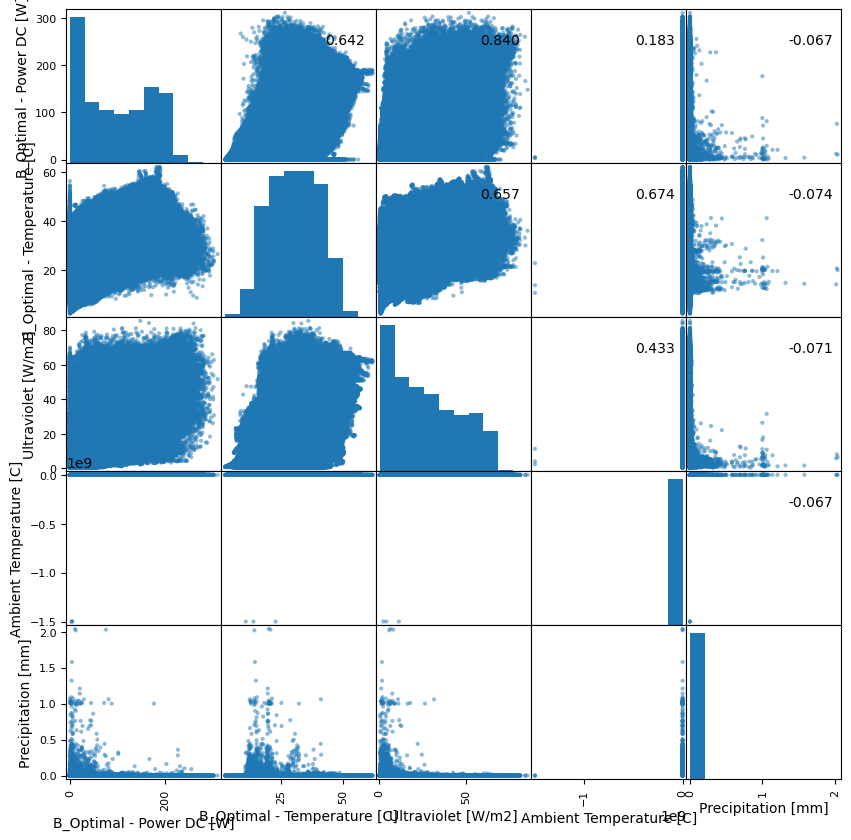

In [39]:
# correlation matrix for panel b
axes = pd.plotting.scatter_matrix(sunlab_faro[['B_Optimal - Power DC [W]', 'B_Optimal - Temperature [C]', 'Ultraviolet [W/m2]', 
                                               'Ambient Temperature [C]', 'Precipitation [mm]']], alpha=0.5,figsize = [10,10])
corr = sunlab_faro[['B_Optimal - Power DC [W]', 'B_Optimal - Temperature [C]', 'Ultraviolet [W/m2]', 
                                               'Ambient Temperature [C]', 'Precipitation [mm]']].corr(method = 'spearman').to_numpy() #nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

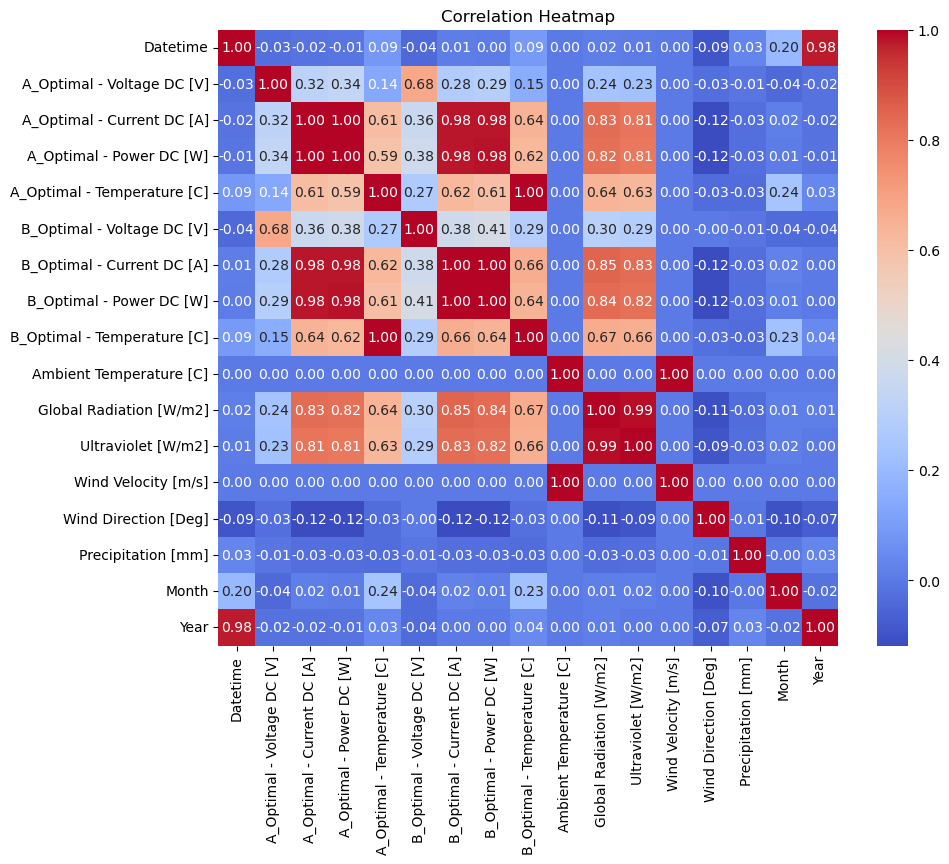

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = sunlab_faro.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

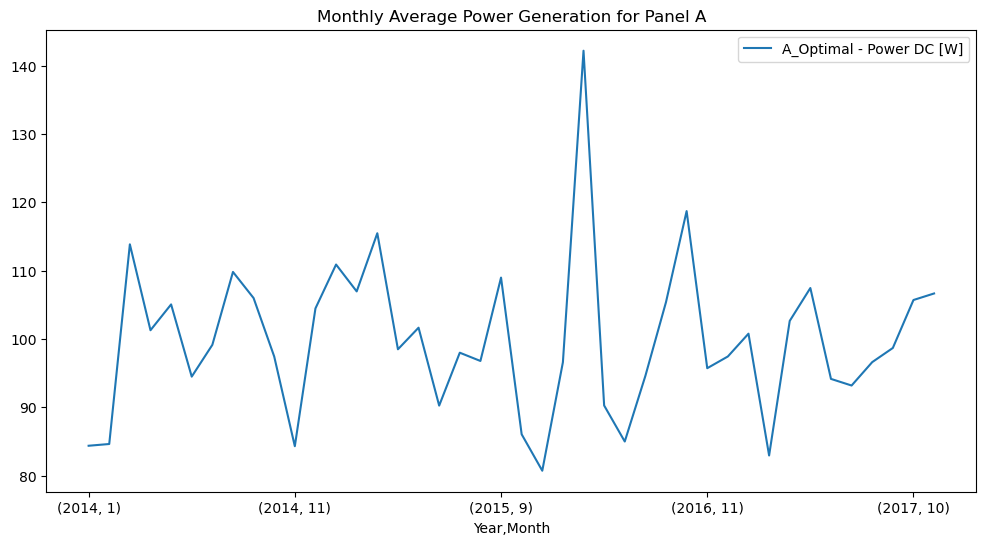

In [41]:
# check for trends for just Power Generation
monthly_avg = sunlab_faro.groupby(['Year', 'Month']).mean()
monthly_avg.plot(y='A_Optimal - Power DC [W]', figsize=(12, 6), title='Monthly Average Power Generation for Panel A')
plt.show()

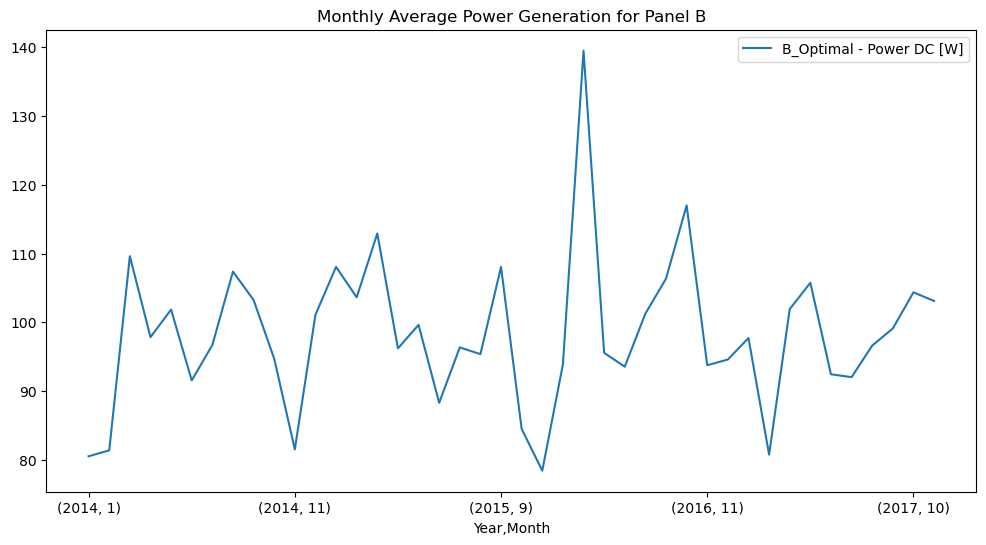

In [42]:
# check for trends for just Power Generation
monthly_avg = sunlab_faro.groupby(['Year', 'Month']).mean()
monthly_avg.plot(y='B_Optimal - Power DC [W]', figsize=(12, 6), title='Monthly Average Power Generation for Panel B')
plt.show()

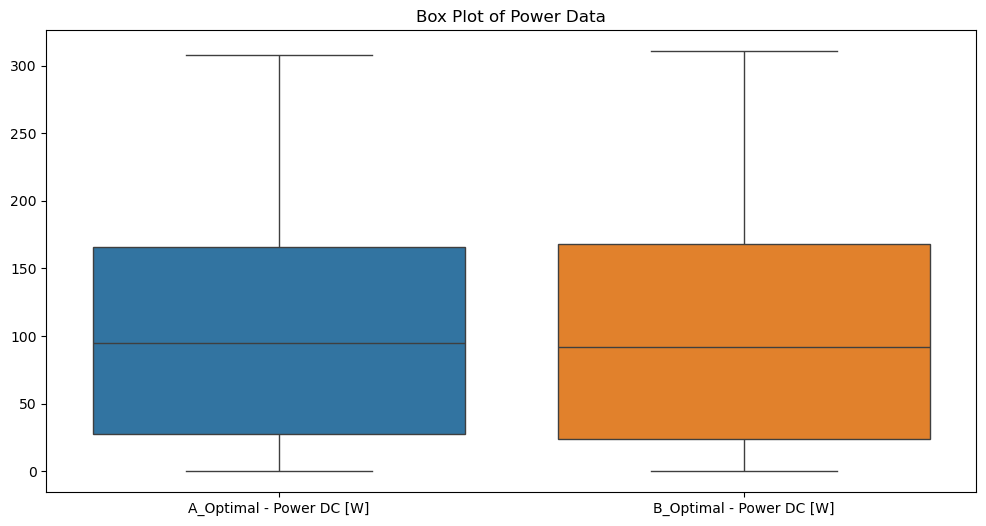

In [43]:
# check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=sunlab_faro[['A_Optimal - Power DC [W]', 'B_Optimal - Power DC [W]']])
plt.title("Box Plot of Power Data")
plt.show()

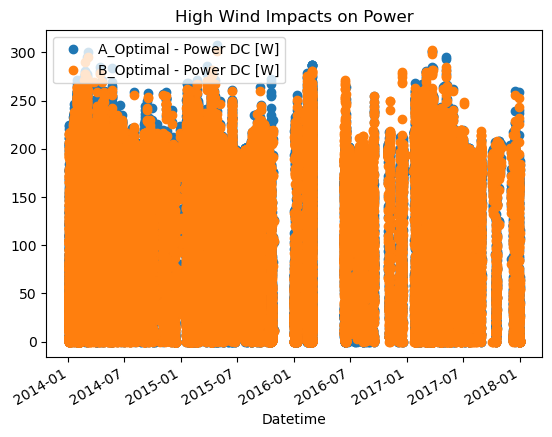

In [44]:
# check wind impacts
high_wind = sunlab_faro[sunlab_faro['Wind Velocity [m/s]'] > sunlab_faro['Wind Velocity [m/s]'].quantile(0.95)]
high_wind.plot(x='Datetime', y=['A_Optimal - Power DC [W]', 'B_Optimal - Power DC [W]'], style='o')
plt.title('High Wind Impacts on Power')
plt.show()

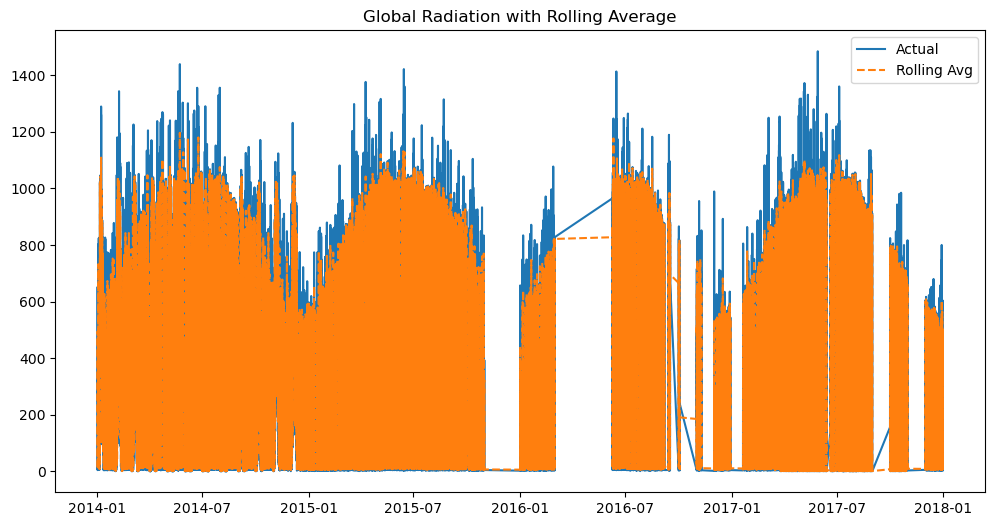

In [45]:
sunlab_faro['Rolling_Avg'] = sunlab_faro['Global Radiation [W/m2]'].rolling(window=24).mean()
plt.figure(figsize=(12, 6))
plt.plot(sunlab_faro['Datetime'], sunlab_faro['Global Radiation [W/m2]'], label='Actual')
plt.plot(sunlab_faro['Datetime'], sunlab_faro['Rolling_Avg'], label='Rolling Avg', linestyle='--')
plt.legend()
plt.title('Global Radiation with Rolling Average')
plt.show()

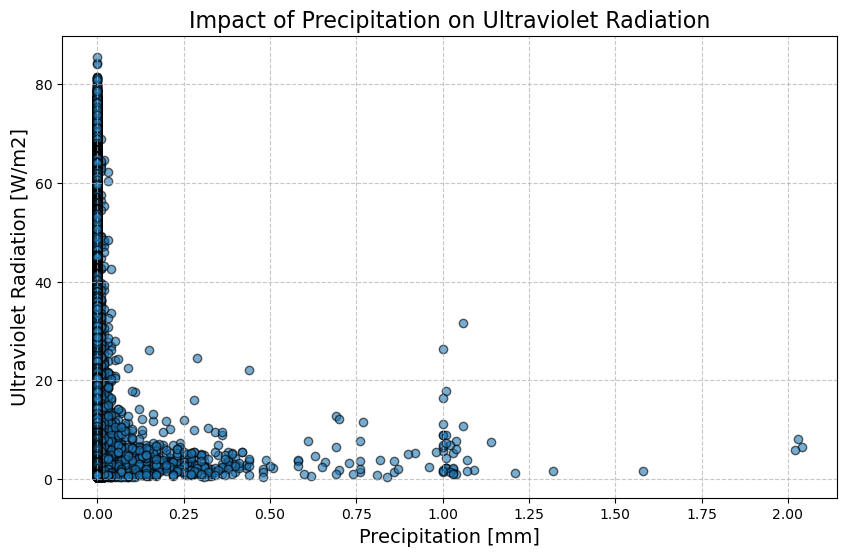

In [46]:
# Scatterplot for rain and ultraviolet
plt.figure(figsize=(10, 6))
plt.scatter(sunlab_faro['Precipitation [mm]'], sunlab_faro['Ultraviolet [W/m2]'], alpha=0.6, edgecolor='k')
plt.title('Impact of Precipitation on Ultraviolet Radiation', fontsize=16)
plt.xlabel('Precipitation [mm]', fontsize=14)
plt.ylabel('Ultraviolet Radiation [W/m2]', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()